In [27]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras._tf_keras.keras import layers
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Input

In [31]:
categories = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]
img_size = (128, 128)
batch_size = 8
workdir = "./workdir/"

# Proses Data
def load_images(folder):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(folder, category)
        label = categories.index(category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, img_size)
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

#x_train, y_train = load_images(train_dir)
#x_test, y_test = load_images(test_dir)

#x_train = x_train / 255.0
#x_test = x_test / 255.0

#x_train = x_train.reshape(-1, 128, 128, 1)
#x_test = x_test.reshape(-1, 128, 128, 1)

#y_train = keras.utils.to_categorical(y_train, 4)
#y_test = keras.utils.to_categorical(y_test, 4)

#x_train.shape[1:]

In [36]:
#from distutils.dir_util import copy_tree

#copy_tree("./dataset/train/", "./workdir/")
#copy_tree("./dataset/test/", "./workdir/")

In [35]:
images, labels = load_images(workdir)
images = images / 255.0
images = images.reshape(6400,128,128,1)
labels = keras.utils.to_categorical(labels)
print(images.shape)
print(labels.shape)

(6400, 128, 128, 1)
(6400, 4)


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

train_data, test_data, train_label, test_label = train_test_split(images,labels,test_size=0.25,random_state=42)
print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)

(4800, 128, 128, 1) (1600, 128, 128, 1) (4800, 4) (1600, 4)


In [37]:
train_data.shape[1:]

(128, 128, 1)

In [38]:
#from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
#
#print("TRAIN:")
#train_datagen = ImageDataGenerator(rescale=1./255)
#train_generator = train_datagen.flow_from_directory(
#    train_dir,
#    target_size=img_size,
#    color_mode="grayscale",
#    batch_size=batch_size,
#    class_mode="sparse")
#
#print("TEST:")
#test_datagen = ImageDataGenerator(rescale=1./255)
#test_generator = test_datagen.flow_from_directory(
#    test_dir,
#    target_size=img_size,
#    color_mode="grayscale",
#    batch_size=batch_size,
#    class_mode="sparse")

In [41]:
def build_model():
    inputs = keras.Input(shape=(128, 128, 1))
    x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(32, (2, 2), padding="same", activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(100, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(4, activation="softmax")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

def build_model_alt1():
    cnn = Sequential()
    cnn.add(Conv2D(64,(3,3), padding="same", activation="relu", input_shape=(128, 128, 1)))
    cnn.add(MaxPooling2D())
    cnn.add(Conv2D(64,(3,3), padding="same", activation="relu"))
    cnn.add(MaxPooling2D())
    cnn.add(Conv2D(32,(2,2), padding="same", activation="relu"))
    cnn.add(MaxPooling2D())
    cnn.add(Flatten())
    cnn.add(Dense(100,activation="relu"))
    #cnn.add(Dropout(0.5))
    cnn.add(Dense(4,activation="softmax"))
    cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return cnn
    
def build_model_alt2():
    inputs = keras.Input(shape=(128, 128, 1))
    x = layers.Conv2D(32, (3, 3), activation="relu")(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, (3, 3), activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, (3, 3), activation="relu")(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(4, activation="softmax")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

cnn = build_model_alt1()
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       819,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 865,496 (3.30 MB)

 Trainable params: 865,496 (3.30 MB)

 Non-trainable params: 0 (0.00 B)

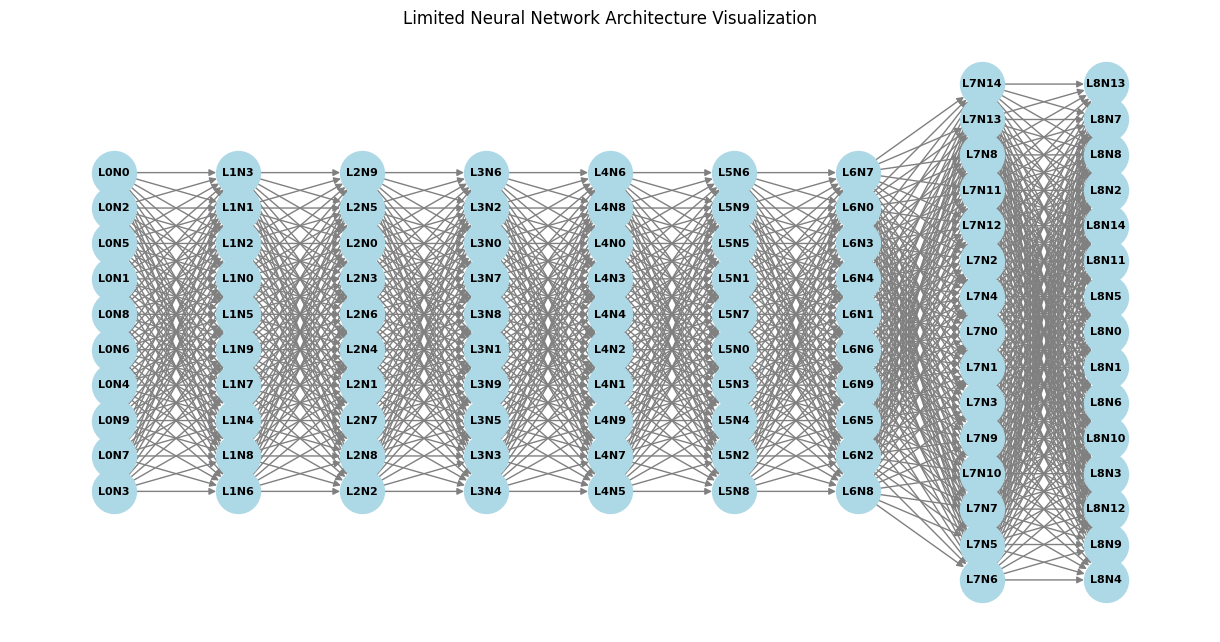

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

prev_layer_nodes = []
layer_index = 0

for layer in cnn.layers:
    num_neurons = 15 if isinstance(layer, Dense) else 10  # limit neurons
    layer_nodes = [f"L{layer_index}N{i}" for i in range(num_neurons)]

    for node in layer_nodes:
        G.add_node(node, layer=layer_index)
    
    for prev_node in prev_layer_nodes:
        for node in layer_nodes:
            G.add_edge(prev_node, node)
    
    prev_layer_nodes = layer_nodes
    layer_index += 1

pos = nx.multipartite_layout(G, subset_key="layer")
plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=8, font_weight="bold")
plt.title("Limited Neural Network Architecture Visualization")
plt.show()

In [56]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 4)
history=cnn.fit(train_data, train_label, epochs=15, validation_data=(test_data, test_label), batch_size=batch_size)

Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 240s 399ms/step - accuracy: 0.8615 - loss: 0.4230 - val_accuracy: 0.9544 - val_loss: 0.1215
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 258s 393ms/step - accuracy: 0.9642 - loss: 0.0986 - val_accuracy: 0.9444 - val_loss: 0.1563
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 245s 408ms/step - accuracy: 0.9820 - loss: 0.0474 - val_accuracy: 0.9731 - val_loss: 0.0750
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 238s 397ms/step - accuracy: 0.9841 - loss: 0.0454 - val_accuracy: 0.9812 - val_loss: 0.0663
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 239s 398ms/step - accuracy: 0.9970 - loss: 0.0093 - val_accuracy: 0.9844 - val_loss: 0.0457
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 239s 398ms/step - accuracy: 0.9999 - loss: 8.6437e-04 - val_accuracy: 0.9862 - val_loss: 0.0460
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 239s 399ms/step - accuracy: 1.0000 - loss: 3.7470e-04 - val_accuracy: 0.9887 - val_loss: 0.0406
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 239s 398ms/step - accuracy: 

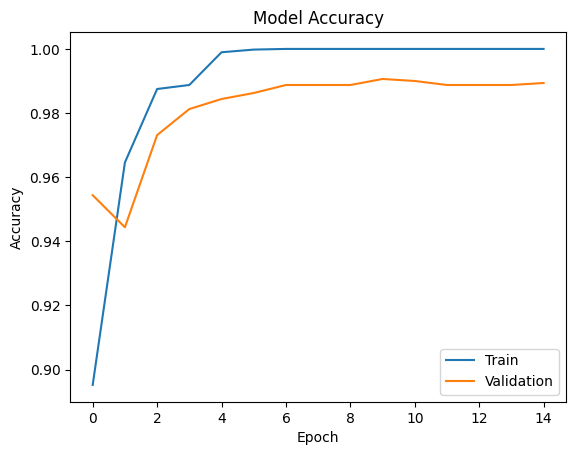

In [57]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "lower right")
plt.show()

In [58]:
y_pred=cnn.predict(test_data)
y_val=[]
for y in y_pred:
    y_val.append(np.argmax(y))
y_true=[]
for y in test_label:
    y_true.append(np.argmax(y))
print(confusion_matrix(y_true,y_val))

50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 376ms/step
[[238   0   1   2]
 [  0  12   0   0]
 [  0   0 804  10]
 [  0   0   4 529]]


In [59]:
from PIL import Image
from keras._tf_keras.keras.preprocessing import image

def predict_label(img_path):
    #i = Image.open(img_path).convert("L")
    i = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    i = cv2.resize(i, img_size)
    i = image.img_to_array(i) / 255.0
    i = i.reshape(-1,128,128,1)
    
    predict_x = cnn.predict(i) 
    classes_x = np.argmax(predict_x, axis=1)

    #return show_image(img_path), Labels[classes_x[0]]
    return categories[classes_x[0]]

print(predict_label("dataset/test/NonDemented/26.jpg"))
print(predict_label("dataset/test/VeryMildDemented/32 (10).jpg"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
NonDemented
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
VeryMildDemented


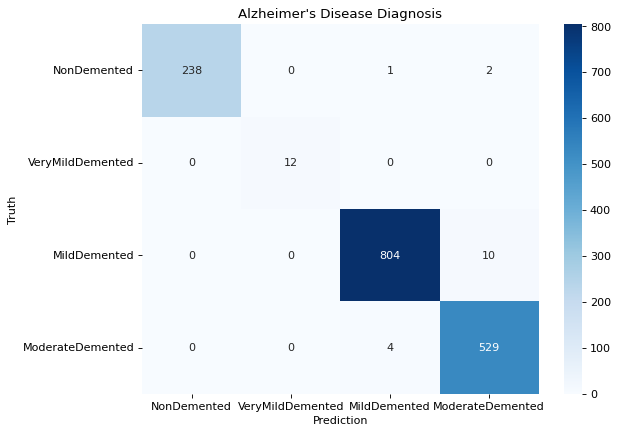

In [60]:
import seaborn as sns
cm = confusion_matrix(y_true,y_val)
Labels = ["NonDemented", "VeryMildDemented", "MildDemented", "ModerateDemented"]
plt.figure(figsize=(8, 6), dpi=80, facecolor="w", edgecolor="k")
ax = sns.heatmap(cm, cmap="Blues", annot=True, fmt="d", xticklabels=Labels, yticklabels=Labels)
plt.title("Alzheimer\'s Disease Diagnosis")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show(ax)

In [61]:
print("Classification Report\n")
print(classification_report(y_true, y_val))

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       241
           1       1.00      1.00      1.00        12
           2       0.99      0.99      0.99       814
           3       0.98      0.99      0.99       533

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [62]:
print("Accuracy on test data: ", accuracy_score(y_true, y_val))

Accuracy on test data:  0.989375


In [63]:
#cnn.save("alzheimer_model.h5")
cnn.save("alzheimer_model.keras")